In [1]:
import pandas as pd                                      #importing necessary Files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### Loading Dataset

In [2]:
df=pd.read_csv('E:/Flip Robo/Micro Credit Project/Data File.csv')                 # Loading dataset to dataframe      
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 37)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)  #Removing feature Unnamed which is just for represntation of indexes as it will have no impact on output variable
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


###### DESCRIPTION OF COULMNS

label-->Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}                    
msisdn-->	  mobile number of user                                                                    
aon-->	age on cellular network in days                                                           
daily_decr30-->	  Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                   
daily_decr90-->	  Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                       
rental30-->	  Average main account balance over last 30 days                                                  
rental90-->	  Average main account balance over last 90 days                                                   
last_rech_date_ma-->	  Number of days till last recharge of main account                                           
last_rech_date_da-->	  Number of days till last recharge of data account                                            
last_rech_amt_ma-->	  Amount of last recharge of main account (in Indonesian Rupiah)                                    
cnt_ma_rech30-->	  Number of times main account got recharged in last 30 days                                      
fr_ma_rech30-->	  Frequency of main account recharged in last 30 days                                                      
sumamnt_ma_rech30-->	  Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)             
medianamnt_ma_rech30->Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal30->Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)  
cnt_ma_rech90-->	  Number of times main account got recharged in last 90 days                                               
fr_ma_rech90-->	  Frequency of main account recharged in last 90 days                                                    
sumamnt_ma_rech90-->	  Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)           
medianamnt_ma_rech90->Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
medianmarechprebal90->Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)    
cnt_da_rech30-->	  Number of times data account got recharged in last 30 days                                      
fr_da_rech30-->	  Frequency of data account recharged in last 30 days                                           
cnt_da_rech90-->	  Number of times data account got recharged in last 90 days                                         
fr_da_rech90-->	  Frequency of data account recharged in last 90 days                                                 
cnt_loans30-->	  Number of loans taken by user in last 30 days                                                      
amnt_loans30-->	  Total amount of loans taken by user in last 30 days                                               
maxamnt_loans30-->	  maximum amount of loan taken by the user in last 30 days                                          
medianamnt_loans30-->	  Median of amounts of loan taken by the user in last 30 days                                    
cnt_loans90-->	  Number of loans taken by user in last 90 days                                               
amnt_loans90-->	  Total amount of loans taken by user in last 90 days                                                  
maxamnt_loans90-->	  maximum amount of loan taken by the user in last 90 days                                          
medianamnt_loans90-->	  Median of amounts of loan taken by the user in last 90 days                                  
payback30-->	  Average payback time in days over last 30 days                                               
payback90-->	  Average payback time in days over last 90 days                                                       
pcircle-->	  telecom circle                                                                             
pdate-->	  date

#### DATA CLEANING

In [5]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

#### Checking for null values

In [6]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

###### Our dataset has no missing values

In [7]:
df.dtypes                                  #Checking dtypes of columns

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

## EDA

In [8]:
# Let's find out no. of unique entries in each column
df.nunique().to_frame().transpose()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,2,186243,4507,147026,158670,132148,141033,1186,1174,70,...,1050,6,1110,69,3,6,1363,2381,1,82


Some of the columns have repeating values!!! and pcircle consists only one unique value

In [9]:
df['pdate'].sample(10)

60934     2016-07-21
122506    2016-07-08
145780    2016-07-05
115236    2016-07-17
128349    2016-07-23
167436    2016-07-01
138570    2016-06-21
107758    2016-07-06
109350    2016-08-08
147782    2016-06-27
Name: pdate, dtype: object

-->From pdate column it can be seen that this column consists of dates with only year 2016

In [10]:
df.drop(['msisdn','pcircle'],axis=1,inplace=True)

In [11]:
df.sample(10)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
10229,1,312.0,3651.824000,3663.320000,3808.02,4917.18,4.0,0.0,770,6,...,18,6.0,0.0,4.0,24,6,0.0,6.500000,5.333333,2016-07-09
130129,1,885.0,11705.630667,11798.460000,4343.72,5076.48,7.0,0.0,770,6,...,30,6.0,0.0,11.0,66,6,0.0,2.000000,2.400000,2016-07-28
36932,1,1484.0,6647.486667,6698.730000,8208.16,10645.66,2.0,0.0,773,7,...,42,12.0,0.0,8.0,54,12,0.0,3.833333,4.000000,2016-07-10
174619,1,479.0,10414.236333,10441.709000,3412.30,3454.30,1.0,13.0,8000,2,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-07-23
96681,1,312.0,1342.211667,1347.450000,168.56,189.56,2.0,0.0,770,4,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-07-07
194849,1,312.0,10632.000000,10844.120000,13507.92,17424.12,3.0,0.0,2309,4,...,18,6.0,0.0,13.0,78,6,0.0,8.000000,4.384615,2016-07-31
195053,1,112.0,5.683333,5.683333,2183.72,2183.72,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-06-11
95148,0,1073.0,0.000000,0.000000,73.08,73.08,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-06-14
26910,1,820.0,23.069333,23.069333,-17.72,-17.72,1.0,0.0,4048,2,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-04
40338,1,102.0,4200.000000,4207.500000,2659.11,2689.11,6.0,101.0,770,4,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-05


In [12]:
df['pdate']=pd.to_datetime(df['pdate'])                                 #Extracting Month and day from date columns
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Day']=df['pdate'].apply(lambda x:x.day)

In [13]:
df.drop('pdate',axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


### Checking correlation

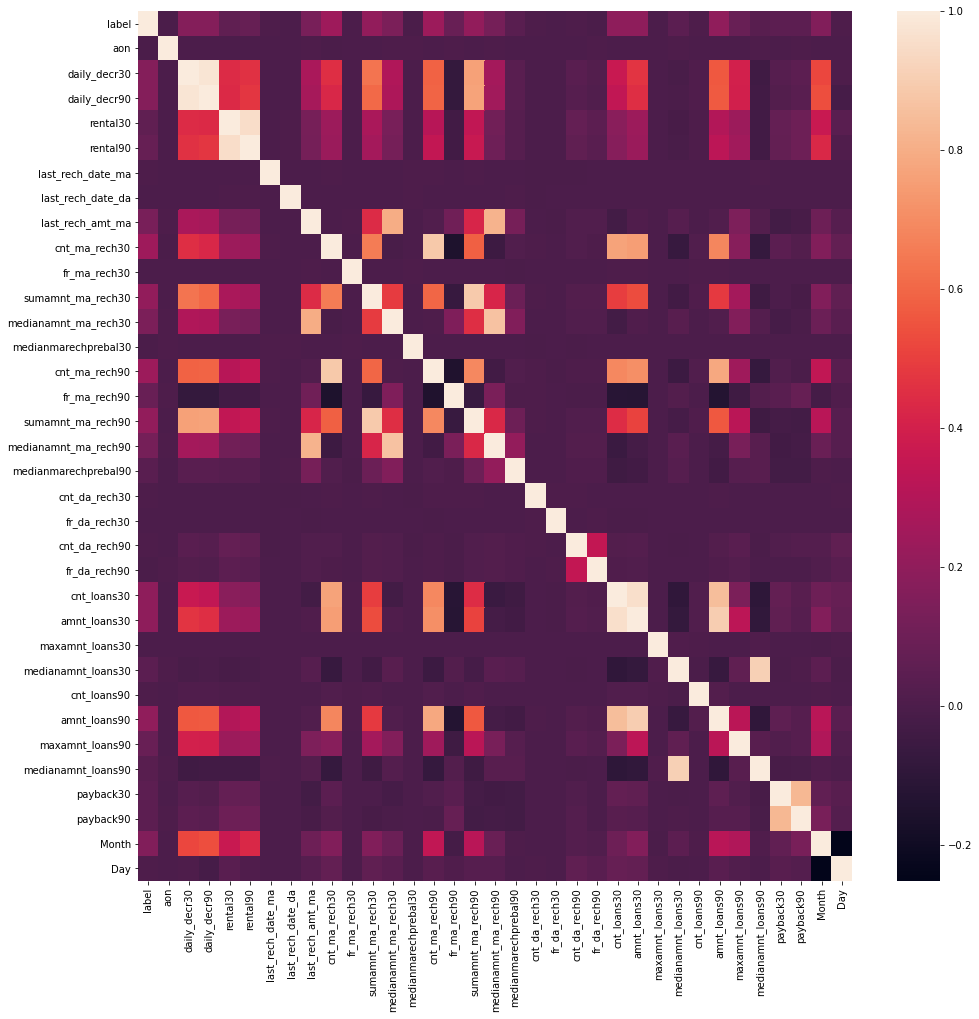

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())

From correlation, following observations can be drawn:                                                            
-> most of the columns have negative correlation with the target variable                                                 
-> some of the inputs are highly positively correlated with each other eg. payback30 & paybacck90, cmt_loan30 & amnt_loans90,rental30 & rental90, daily_decr30 & daily_decr90                                            
-> we can drop some of the input columns which are highly correlated with each other                                     
-> aon,medianmarechprebal30 are negatively correlated with target variable so we can drop these columns

In [15]:
df.drop(['aon','medianmarechprebal30','payback90','amnt_loans90','rental90','daily_decr90'],axis=1,inplace=True)

In [16]:
df.shape

(209593, 29)

##### Checking Outliers

In [17]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
df[(z>3).all(axis=1)]

,label,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,Month,Day


Our dataset is perfect having no outliers as well as missing values

In [18]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

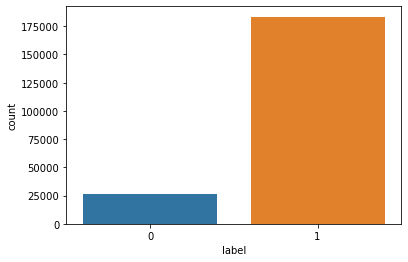

In [19]:
#Visualize the count of number of label
sns.countplot(df['label'],label="Count")

87.5% label values are 1.....so our dataset is imbalanced....there are chances of biasing

##### Checking Skewness

In [20]:
df.skew()

label                   -2.270254
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
Month                    0.343242
Day                      0.199845
dtype: float64

There are lot of columns which are highly skewed. We will remove skewness later using power transform method

In [21]:
x=df.drop('label',axis=1)
x.shape

(209593, 28)

In [22]:
y=df['label']
y.shape

(209593,)

In [23]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [24]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 3.32155993e-01, -5.80785900e-01, -2.55128626e-02, ...,
         1.81326608e+00,  3.97521887e-01,  7.10817053e-01],
       [ 1.11602076e+00,  3.39736181e-01,  1.91367959e-01, ...,
        -9.37405389e-01,  1.48013263e+00, -4.10150856e-01],
       [-7.50823891e-03, -3.66964592e-01,  4.35826136e-05, ...,
        -9.37405389e-01,  1.48013263e+00,  6.09966726e-01],
       ...,
       [ 1.10045476e+00,  8.25400365e-01,  4.35826136e-05, ...,
         9.74291963e-01,  3.97521887e-01,  1.54675655e+00],
       [ 1.13605674e+00, -5.15607139e-01, -2.55128626e-02, ...,
        -9.37405389e-01,  3.97521887e-01,  1.18938459e+00],
       [ 5.25021274e-01, -4.92433448e-01,  1.36681144e-01, ...,
        -9.37405389e-01,  3.97521887e-01, -8.19411709e-01]])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [27]:
# creating train test split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1000)

In [28]:
lr.fit(x_train,y_train)
print('Training score',lr.score(x_train,y_train))
print('Accuracy',accuracy_score(y_test,lr.predict(x_test)))

Training score 0.8836611519973282
Accuracy 0.8813187337484196


#### Classification Report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.63      0.13      0.21      5246
           1       0.89      0.99      0.94     36673

    accuracy                           0.88     41919
   macro avg       0.76      0.56      0.57     41919
weighted avg       0.86      0.88      0.85     41919



In [30]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv=",j)
    print("Cross Validation Score is:-",lsc*100)
    print("Accuracy_score is:-",lss*100)
    print("\n")

At cv= 2
Cross Validation Score is:- 88.32403734338641
Accuracy_score is:- 88.13187337484196


At cv= 3
Cross Validation Score is:- 88.33023973562925
Accuracy_score is:- 88.13187337484196


At cv= 4
Cross Validation Score is:- 88.33596535643396
Accuracy_score is:- 88.13187337484196


At cv= 5
Cross Validation Score is:- 88.32833134900137
Accuracy_score is:- 88.13187337484196


At cv= 6
Cross Validation Score is:- 88.34216799198211
Accuracy_score is:- 88.13187337484196


At cv= 7
Cross Validation Score is:- 88.33548853412559
Accuracy_score is:- 88.13187337484196


At cv= 8
Cross Validation Score is:- 88.34693935713413
Accuracy_score is:- 88.13187337484196


At cv= 9
Cross Validation Score is:- 88.34264525886879
Accuracy_score is:- 88.13187337484196




In [31]:
lsscore_selected=cross_val_score(lr,x,y,cv=8).mean()
print("The CV score is ",lsscore_selected,"\n The Accuracy score is:",lss)

The CV score is  0.8834693935713414 
 The Accuracy score is: 0.8813187337484196


#### Hyperparameter Tuning

In [32]:
from pprint import pprint
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
pprint(clf.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


The hyperparameters which I decided to focus on are:

In [33]:
# creating parameter list to pass in gridsearchCV
parameters={'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'multi_class':['auto', 'ovr', 'multinomial']}

In [ ]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(LogisticRegression(),parameters,cv=8)     #intializing gridsearchCV
GCV.fit(x_train,y_train)
GCV.best_estimator_   #finding best estimators
GCV_pred=GCV.best_estimator_.predict(x_test)       #predicting the value using best estimator found by GridSearchCV
print("final Accuracy :", accuracy_score(y_test,GCV_pred)*100)    #Final Accuracy

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,GCV_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC Curve (area:- %.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characterstic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle
filename="micro_credit.pkl"
pickle.dump(lr,open(filename,'wb'))

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted})
df_con.sample(10)